# 1

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('data/02. sales-funnel.xlsx')

In [5]:
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [7]:
pd.pivot_table(df, index=['Name'])  # default : mean(평균)

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [8]:
pd.pivot_table(df, index=['Name','Rep','Manager'])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [9]:
pd.pivot_table(df, index=['Manager','Rep'])

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

In [10]:
pd.pivot_table(df, index=['Manager','Rep'], values=['Price'], aggfunc=np.sum)  # agg = 부분집합

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [12]:
pd.pivot_table(df, index=['Manager','Rep'], values=['Price'], aggfunc=[np.sum, len])  # len = count(계산된 row 개수)

sum   len
                              Price Price
Manager       Rep                        
Debra Henley  Craig Booker    80000     4
              Daniel Hilton  115000     3
              John Smith      40000     2
Fred Anderson Cedric Moss    110000     4
              Wendy Yule     177000     4

In [13]:
pd.pivot_table(df, index=['Manager','Rep'], values=['Price'], columns=['Product'], aggfunc=[np.sum, len])  # product를 column으로 사용

sum                                len  \
                                Price                              Price   
Product                           CPU Maintenance Monitor Software   CPU   
Manager       Rep                                                          
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0   2.0   
              Daniel Hilton  105000.0         NaN     NaN  10000.0   2.0   
              John Smith      35000.0      5000.0     NaN      NaN   1.0   
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0   2.0   
              Wendy Yule     165000.0      7000.0  5000.0      NaN   2.0   

                                                          
                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker          1.0     NaN      1.0  
              Daniel Hilton         NaN     NaN      1.0  
              John Smith            1.0     NaN      NaN  
Fred Anderson Cedric Moss           1.0     NaN      1.0  
              Wendy Yule            1.0     1.0      NaN

In [14]:
pd.pivot_table(df, index=['Manager','Rep'], values=['Price'], columns=['Product'], aggfunc=[np.sum, len], fill_value=0) # fill_value =  NaN처리

sum                                len  \
                              Price                              Price   
Product                         CPU Maintenance Monitor Software   CPU   
Manager       Rep                                                        
Debra Henley  Craig Booker    65000        5000       0    10000     2   
              Daniel Hilton  105000           0       0    10000     2   
              John Smith      35000        5000       0        0     1   
Fred Anderson Cedric Moss     95000        5000       0    10000     2   
              Wendy Yule     165000        7000    5000        0     2   

                                                          
                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker            1       0        1  
              Daniel Hilton           0       0        1  
              John Smith              1       0        0  
Fred Anderson Cedric Moss             1       0        1  
              Wendy Yule              1       1        0

# 위의 pivot_table을 이용하여 예제
### 구 이름을 포함한 서울시 범죄.csv
- 구별 범죄 총합
- 구별 범죄 평균

In [16]:
df2 = pd.read_csv('data/02. crime_in_Seoul_include_gu_name.csv')

In [17]:
df2.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [21]:
pd.pivot_table(df2, index=['구별'], values=['살인 발생','강도 발생','강간 발생','절도 발생'], aggfunc=[np.sum, len])

sum                     len                  
     강간 발생 강도 발생 살인 발생 절도 발생 강간 발생 강도 발생 살인 발생 절도 발생
구별                                                  
강남구    449    21    13  3850     2     2     2     2
강동구    156     6     4  2366     1     1     1     1
강북구    153    14     7  1434     1     1     1     1
강서구    262    13     7  2096     1     1     1     1
관악구    320    12     9  2706     1     1     1     1
광진구    240    14     4  3026     1     1     1     1
구로구    281    15     8  2335     1     1     1     1
금천구    151     6     3  1567     1     1     1     1
노원구    197     7    10  2193     1     1     1     1
도봉구    102     9     3  1063     1     1     1     1
동대문구   173    13     5  1981     1     1     1     1
동작구    285     9     5  1865     1     1     1     1
마포구    294    14     8  2555     1     1     1     1
서대문구   154     5     2  1812     1     1     1     1
서초구    393     9     8  2635     2     2     2     2
성동구    126     9     4  1607     1     1     1     1
성북구    150     5     5  1785     2     2     2     2
송파구    220    13    11  3239     1     1     1     1
양천구    120     6     3  1890     1     1     1     1
영등포구   295    22    14  2964     1     1     1     1
용산구    194    14     5  1557     1     1     1     1
은평구    166     9     3  1914     2     2     2     2
종로구    211    11     6  2184     2     2     2     2
중구     170     9     3  2548     2     2     2     2
중랑구    187    11    13  2135     1     1     1     1

In [22]:
pd.pivot_table(df2, index=['구별'], values=['살인 발생','강도 발생','강간 발생','절도 발생'], aggfunc=[np.mean, len])

mean                       len                  
      강간 발생 강도 발생 살인 발생   절도 발생 강간 발생 강도 발생 살인 발생 절도 발생
구별                                                     
강남구   224.5  10.5   6.5  1925.0     2     2     2     2
강동구   156.0   6.0   4.0  2366.0     1     1     1     1
강북구   153.0  14.0   7.0  1434.0     1     1     1     1
강서구   262.0  13.0   7.0  2096.0     1     1     1     1
관악구   320.0  12.0   9.0  2706.0     1     1     1     1
광진구   240.0  14.0   4.0  3026.0     1     1     1     1
구로구   281.0  15.0   8.0  2335.0     1     1     1     1
금천구   151.0   6.0   3.0  1567.0     1     1     1     1
노원구   197.0   7.0  10.0  2193.0     1     1     1     1
도봉구   102.0   9.0   3.0  1063.0     1     1     1     1
동대문구  173.0  13.0   5.0  1981.0     1     1     1     1
동작구   285.0   9.0   5.0  1865.0     1     1     1     1
마포구   294.0  14.0   8.0  2555.0     1     1     1     1
서대문구  154.0   5.0   2.0  1812.0     1     1     1     1
서초구   196.5   4.5   4.0  1317.5     2     2     2     2
성동구   126.0   9.0   4.0  1607.0     1     1     1     1
성북구    75.0   2.5   2.5   892.5     2     2     2     2
송파구   220.0  13.0  11.0  3239.0     1     1     1     1
양천구   120.0   6.0   3.0  1890.0     1     1     1     1
영등포구  295.0  22.0  14.0  2964.0     1     1     1     1
용산구   194.0  14.0   5.0  1557.0     1     1     1     1
은평구    83.0   4.5   1.5   957.0     2     2     2     2
종로구   105.5   5.5   3.0  1092.0     2     2     2     2
중구     85.0   4.5   1.5  1274.0     2     2     2     2
중랑구   187.0  11.0  13.0  2135.0     1     1     1     1

# 2

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import seaborn as sns

In [26]:
x = np.linspace(0, 14, 100)  #linear(선형)

In [31]:
y1 = np.sin(x)
y2 = 2*np.sin(x+0.5)

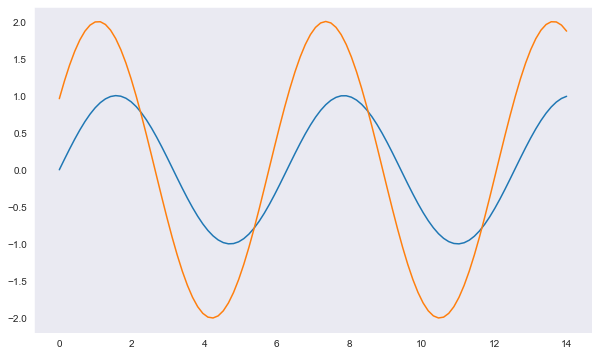

In [35]:
sns.set_style('dark')  # seaborn을 이용한 배경 설정
plt.figure(figsize=(10,6))  # figure = 데이터의 테두리 설정
plt.plot(x, y1, x, y2)  # ()안에 xy 쌍의 개수에 따라 그래프를 그려준다.
plt.show()

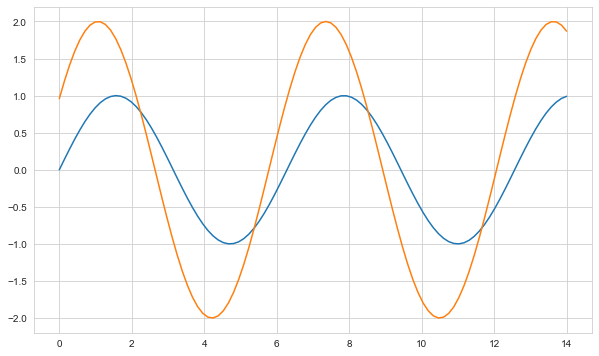

In [36]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot(x, y1, x, y2) 
plt.show()

# 3

In [38]:
tips = sns.load_dataset('tips')

In [39]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


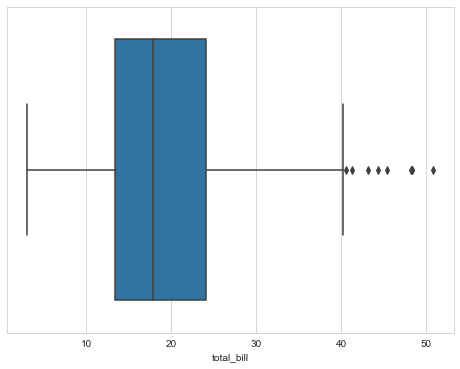

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))  
sns.boxplot(x=tips['total_bill'])
plt.show()

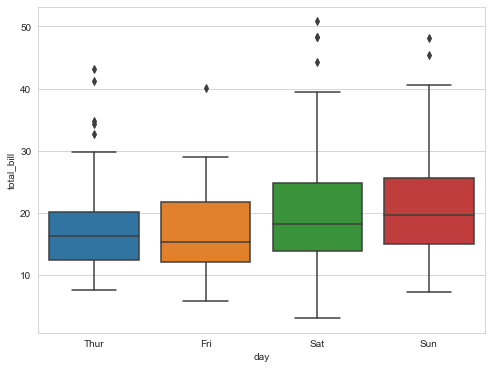

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.boxplot(x='day' ,y=tips['total_bill'], data=tips)
plt.show()

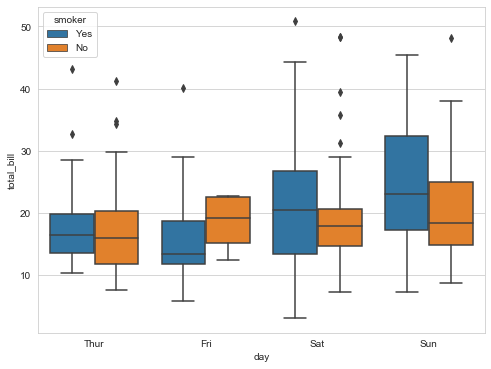

In [46]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.boxplot(x='day' ,y=tips['total_bill'], hue='smoker', data=tips)
plt.show()

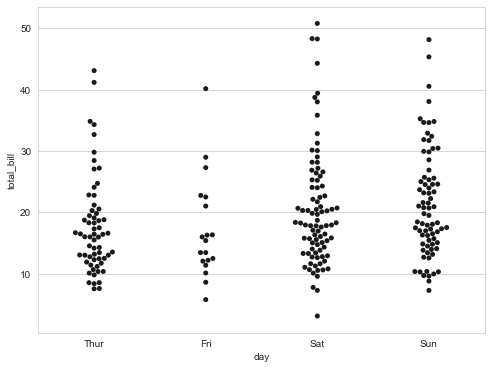

In [48]:
plt.figure(figsize=(8,6))    
sns.swarmplot(x='day' ,y=tips['total_bill'], data=tips, color=".1")  # color = 점의 진하기
plt.show()

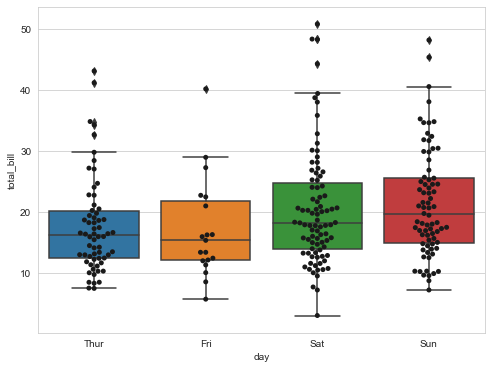

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day' ,y=tips['total_bill'], data=tips)
sns.swarmplot(x='day' ,y=tips['total_bill'], data=tips, color=".1")  # color = 점의 진하기
plt.show()

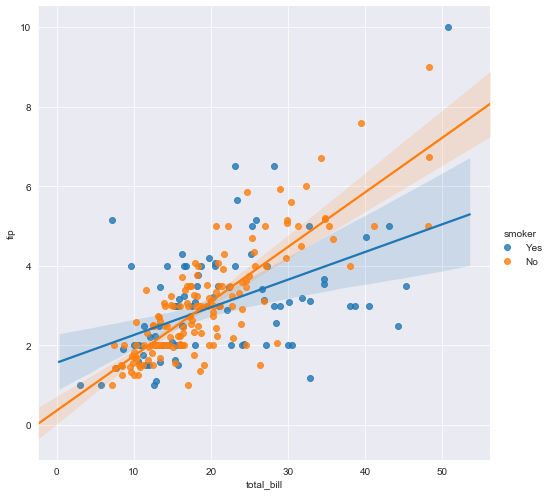

In [54]:
sns.set_style('darkgrid')
sns.lmplot(x='total_bill', y='tip', hue='smoker',data=tips, size=7)
plt.show()

In [55]:
uniform_data = np.random.rand(10,12)
uniform_data

array([[0.12025344, 0.95364517, 0.4631806 , 0.23079647, 0.09225363,
        0.33304886, 0.29887136, 0.78676481, 0.43441364, 0.24141541,
        0.4988951 , 0.06561774],
       [0.28887105, 0.51058627, 0.01267574, 0.69727331, 0.84149308,
        0.92589467, 0.81115183, 0.97400788, 0.38257469, 0.53634885,
        0.4378658 , 0.05309989],
       [0.69301657, 0.43216828, 0.17905406, 0.66584317, 0.60722215,
        0.62647742, 0.40044816, 0.76387379, 0.34494586, 0.12585522,
        0.72731216, 0.36146179],
       [0.09185277, 0.39378567, 0.0356775 , 0.61527665, 0.44084483,
        0.63984028, 0.71910188, 0.50960321, 0.25596394, 0.40241938,
        0.4255782 , 0.31920923],
       [0.17093225, 0.38472037, 0.9061273 , 0.21484225, 0.12686623,
        0.3289395 , 0.40827159, 0.21265683, 0.15592606, 0.91419894,
        0.22192543, 0.92448052],
       [0.85533078, 0.18894333, 0.3565397 , 0.39457403, 0.54515586,
        0.26563659, 0.12733431, 0.44624389, 0.49968599, 0.9972473 ,
        0.40047394,

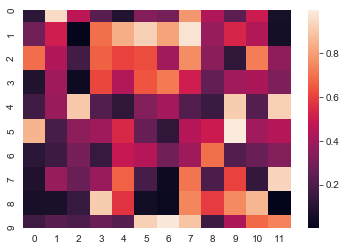

In [56]:
sns.heatmap(uniform_data)
plt.show()

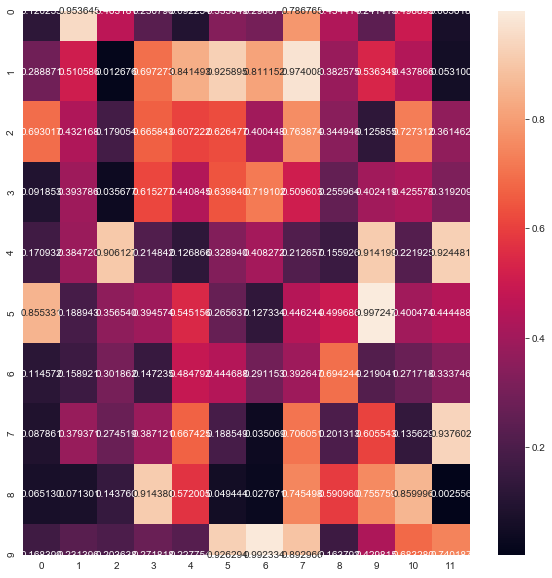

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(uniform_data, annot=True, fmt='f')  # annot = input number / fmt = .(소수점) format
plt.show()

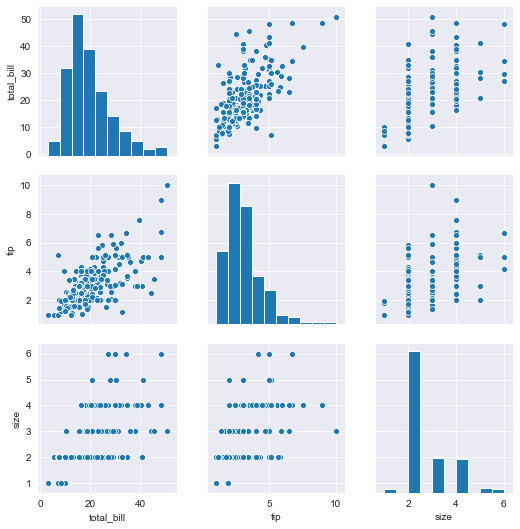

In [60]:
sns.pairplot(tips)
plt.show()

# 4

In [62]:
sns.set(style = 'ticks')
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- 꽃받침 = sepal
- 꽃잎 = petal

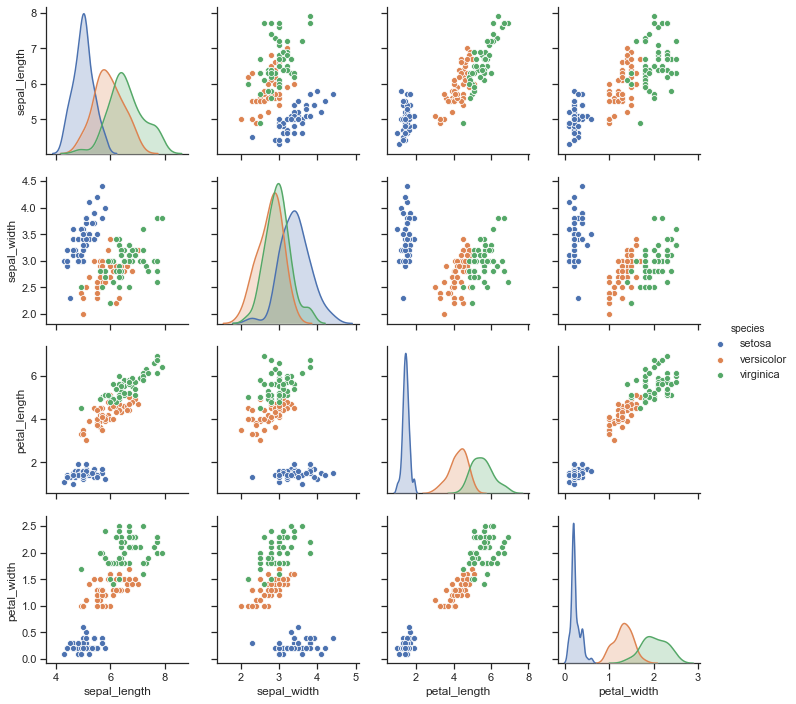

In [64]:
sns.pairplot(iris, hue = 'species')
plt.show()

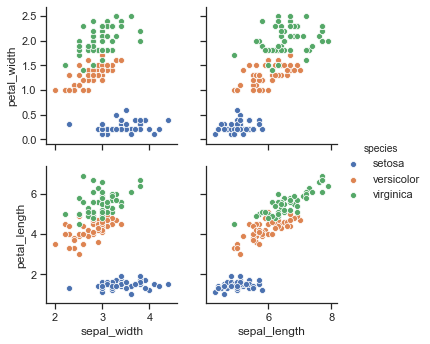

In [66]:
sns.pairplot(iris, x_vars = ['sepal_width', 'sepal_length'],
                   y_vars = ['petal_width', 'petal_length'], hue = 'species')
plt.show()